In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("max_columns", 300)

In [64]:
events_m = pd.read_csv('data/processed_men/events.csv')
events_w = pd.read_csv('data/processed_women/events.csv')

events_m.head()

,Season,DayNum,tourney,WTeamID,LTeamID,WFinalScore,LFinalScore,Final_difference,n_OT,Halftime_difference,3mins_difference,game_lc,half2_lc,crunchtime_lc,Wpoints_made_half2,Lpoints_made_half2,Wpoints_made_crunchtime,Lpoints_made_crunchtime,Wmade1_game,Lmade1_game,Wmade2_game,Lmade2_game,Wmade3_game,Lmade3_game,Wreb_game,Lreb_game,Wturnover_game,Lturnover_game,Wassist_game,Lassist_game,Wsteal_game,Lsteal_game,Wblock_game,Lblock_game,Wmade1_half2,Lmade1_half2,Wmade2_half2,Lmade2_half2,Wmade3_half2,Lmade3_half2,Wreb_half2,Lreb_half2,Wturnover_half2,Lturnover_half2,Wassist_half2,Lassist_half2,Wsteal_half2,Lsteal_half2,Wblock_half2,Lblock_half2,Wmade1_crunchtime,Lmade1_crunchtime,Wmade2_crunchtime,Lmade2_crunchtime,Wmade3_crunchtime,Lmade3_crunchtime,Wreb_crunchtime,Lreb_crunchtime,Wturnover_crunchtime,Lturnover_crunchtime,Wassist_crunchtime,Lassist_crunchtime,Wsteal_crunchtime,Lsteal_crunchtime,Wblock_crunchtime,Lblock_crunchtime,WAst_perc_game,LAst_perc_game,WFGM_perc_game,LFGM_perc_game,WFGM3_perc_game,LFGM3_perc_game,WFTM_perc_game,LFTM_perc_game,WAst_perc_half2,LAst_perc_half2,WFGM_perc_half2,LFGM_perc_half2,WFGM3_perc_half2,LFGM3_perc_half2,WFTM_perc_half2,LFTM_perc_half2,WAst_perc_crunchtime,LAst_perc_crunchtime,WFGM_perc_crunchtime,LFGM_perc_crunchtime,WFGM3_perc_crunchtime,LFGM3_perc_crunchtime,WFTM_perc_crunchtime,LFTM_perc_crunchtime,competitive
0,2015,11,0,1103,1420,74,57,17,0.0,11.0,24.0,12,0,0.0,37.0,31.0,3.0,11.0,12,14,13,17,12,3,39,40,12,16,17,13,7,9,5,0,5,12,4,8,8,1,23,23,7,6,9,7,2,7,4,0,1,4,1,2,0,1,1,7,1,1,0,2,0,1,1,0,0.680000,0.650000,0.471698,0.416667,0.400000,0.250000,0.571429,0.500000,0.750000,0.777778,0.480000,0.375000,0.500000,0.250000,0.416667,0.521739,0.000000,0.666667,0.200000,0.75,0.000000,1.0,0.500000,0.666667,0
1,2015,11,0,1104,1406,82,54,28,0.0,12.0,30.0,4,0,0.0,43.0,24.0,5.0,7.0,17,11,22,11,7,7,36,36,8,22,17,9,14,2,9,2,8,7,13,7,3,1,19,19,4,12,9,3,8,1,6,1,2,2,0,2,1,0,5,3,1,0,1,0,0,1,0,1,0.586207,0.500000,0.460317,0.360000,0.304348,0.333333,0.894737,0.733333,0.562500,0.375000,0.484848,0.296296,0.300000,0.083333,0.888889,0.875000,1.000000,0.000000,0.166667,0.40,0.500000,0.0,1.000000,1.000000,0
2,2015,11,0,1112,1291,78,55,23,0.0,15.0,25.0,3,0,0.0,38.0,30.0,2.0,4.0,12,8,27,13,4,7,40,32,8,16,17,8,11,2,5,0,6,5,13,8,2,3,14,16,2,7,9,4,4,0,1,0,2,0,0,2,0,0,2,4,0,1,0,0,1,0,0,0,0.548387,0.400000,0.574074,0.384615,0.250000,0.333333,0.480000,0.666667,0.600000,0.363636,0.600000,0.458333,0.250000,0.375000,0.545455,0.714286,0.000000,0.000000,0.000000,0.50,0.000000,0.0,0.400000,0.000000,0
3,2015,11,0,1113,1152,86,50,36,0.0,12.0,32.0,6,0,0.0,46.0,22.0,8.0,4.0,19,13,23,14,7,3,44,36,11,17,17,7,7,5,4,3,14,7,13,6,2,1,29,27,4,11,7,2,6,3,3,2,1,4,2,0,1,0,7,7,0,1,1,0,1,0,0,0,0.566667,0.411765,0.612245,0.320755,0.437500,0.150000,0.558824,0.565217,0.466667,0.285714,0.555556,0.225806,0.333333,0.100000,0.560000,0.437500,0.333333,0.000000,0.500000,0.00,0.333333,0.0,0.166667,0.500000,0
4,2015,11,0,1119,1102,84,78,6,0.0,9.0,9.0,3,0,0.0,38.0,40.0,7.0,10.0,11,10,17,25,13,6,41,32,15,18,18,14,6,8,4,6,7,5,7,13,5,3,21,17,10,11,7,6,4,6,2,4,5,0,1,3,0,1,1,6,1,2,1,1,0,1,1,0,0.600000,0.451613,0.491803,0.500000,0.520000,0.315789,0.647059,0.666667,0.583333,0.375000,0.444444,0.484848,0.555556,0.272727,0.700000,0.625000,1.000000,0.250000,0.500000,0.50,0.000000,0.5,0.833333,0.000000,0


In [65]:
def hardcuts_comp(data, title):
    fig, ax = plt.subplots(2,2, figsize=(18, 12), facecolor='#f7f7f7')
    fig.subplots_adjust(top=0.92)
    fig.suptitle(title, fontsize=18)

    sns.kdeplot(data.game_lc, ax=ax[0][0], legend=False, color='k')
    kde_x, kde_y = ax[0][0].lines[0].get_data()
    ax[0][0].fill_between(kde_x, kde_y, where=(kde_x>20), 
                    interpolate=True, color='crimson', alpha=0.7)
    ax[0][0].set_title('Lead changes in the game', fontsize=14)
    textstr = '\n'.join((
                f'Mean: {round(data.game_lc.mean(), 2)}',
                f'Std deviation: {round(data.game_lc.std(), 2)}',
                f'Competitive games: {round((data.game_lc > 20).mean() * 100, 2)}%'))
    props = dict(boxstyle='round', facecolor='silver', alpha=0.5)
    ax[0][0].text(0.50, 0.90, textstr, transform=ax[0][0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    sns.kdeplot(data.half2_lc, ax=ax[0][1], legend=False, color='k')
    kde_x, kde_y = ax[0][1].lines[0].get_data()
    ax[0][1].fill_between(kde_x, kde_y, where=(kde_x>10), 
                    interpolate=True, color='crimson', alpha=0.7)
    ax[0][1].set_title('Lead changes in the second half', fontsize=14)
    textstr = '\n'.join((
                f'Mean: {round(data.half2_lc.mean(), 2)}',
                f'Std deviation: {round(data.half2_lc.std(), 2)}',
                f'Competitive games: {round((data.half2_lc > 10).mean() * 100, 2)}%'))
    props = dict(boxstyle='round', facecolor='silver', alpha=0.5)
    ax[0][1].text(0.50, 0.90, textstr, transform=ax[0][1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    sns.kdeplot(abs(data['3mins_difference']), ax=ax[1][0], legend=False, color='k')
    kde_x, kde_y = ax[1][0].lines[0].get_data()
    ax[1][0].fill_between(kde_x, kde_y, where=(kde_x<3), 
                    interpolate=True, color='crimson', alpha=0.7)
    ax[1][0].set_title('Point difference in the last 3 minutes of the game', fontsize=14)
    textstr = '\n'.join((
                f'Mean: {round(abs(data["3mins_difference"]).mean(), 2)}',
                f'Std deviation: {round(abs(data["3mins_difference"]).std(), 2)}',
                f'Competitive games: {round((abs(data["3mins_difference"]) < 3).mean() * 100, 2)}%'))
    props = dict(boxstyle='round', facecolor='silver', alpha=0.5)
    ax[1][0].text(0.50, 0.90, textstr, transform=ax[1][0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    sns.kdeplot(data.crunchtime_lc, ax=ax[1][1], legend=False, color='k')
    kde_x, kde_y = ax[1][1].lines[0].get_data()
    ax[1][1].fill_between(kde_x, kde_y, where=(kde_x>2), 
                    interpolate=True, color='crimson', alpha=0.7)
    ax[1][1].set_title('Lead changes in the last 3 minutes of the game', fontsize=14)
    textstr = '\n'.join((
                f'Mean: {round(data.crunchtime_lc.mean(), 2)}',
                f'Std deviation: {round(data.crunchtime_lc.std(), 2)}',
                f'Competitive games: {round((data.crunchtime_lc > 2).mean() * 100, 2)}%'))
    props = dict(boxstyle='round', facecolor='silver', alpha=0.5)
    ax[1][1].text(0.50, 0.90, textstr, transform=ax[1][1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.show()

In [66]:
(events_m.n_OT > 0).mean() * 100

6.285940304865062

In [67]:
(events_m.Final_difference < 4).mean() * 100

16.423768521617426

In [68]:
(events_w.Final_difference < 4).mean() * 100

11.885402109007751

In [69]:
(events_w.n_OT > 0).mean() * 100

4.4085884893914375

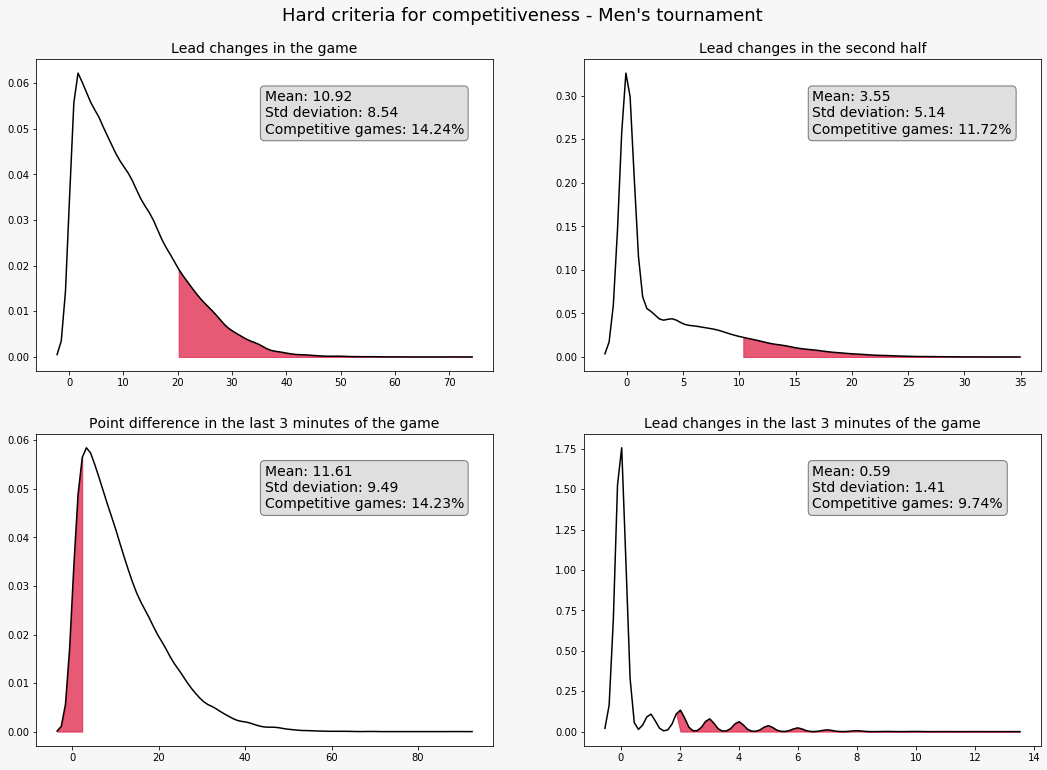

In [70]:
hardcuts_comp(events_m, "Hard criteria for competitiveness - Men's tournament")

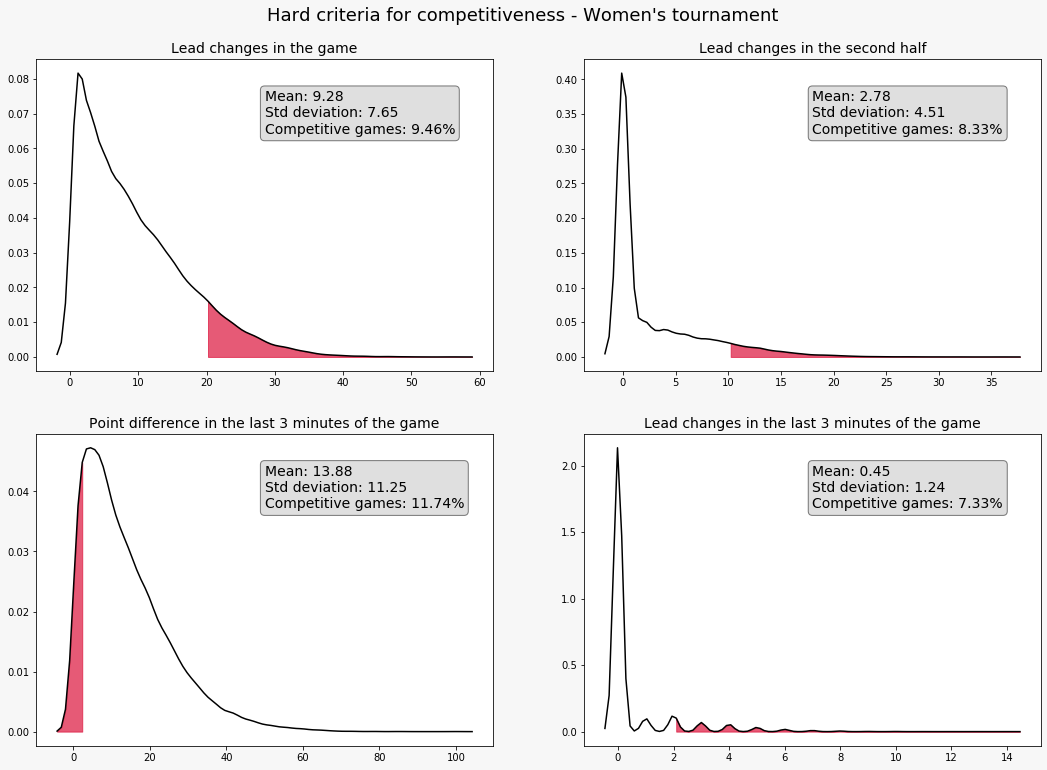

In [71]:
hardcuts_comp(events_w, "Hard criteria for competitiveness - Women's tournament")

# Competitive games

In [72]:
events_m = pd.read_csv('data/processed_men/events_extended.csv')

events_m.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Wtop_team,Wupset,WOT_win,WAway,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wshtg_opportunity,WTO_perposs,WTrue_shooting_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lshtg_opportunity,LTO_perposs,LTrue_shooting_perc,Wdef_rating,Ldef_rating,Wopp_shtg_opportunity,Lopp_shtg_opportunity,Wopp_possessions,Lopp_possessions,Wopp_score,Lopp_score,Wopp_FTA,Wopp_FGA,Lopp_FTA,Lopp_FGA,Wimpact,Limpact,WDR_opportunity,LDR_opportunity,WOR_opportunity,LOR_opportunity,Score_diff,Score_advantage,FGM_diff,FGM_advantage,FGA_diff,FGA_advantage,FGM3_diff,FGM3_advantage,FGA3_diff,FGA3_advantage,FTM_diff,FTM_advantage,FTA_diff,FTA_advantage,OR_diff,OR_advantage,DR_diff,DR_advantage,Ast_diff,Ast_advantage,TO_diff,TO_advantage,Stl_diff,Stl_advantage,Blk_diff,Blk_advantage,PF_diff,PF_advantage,FGM2_diff,FGM2_advantage,FGA2_diff,FGA2_advantage,Tot_Reb_diff,Tot_Reb_advantage,FGM_no_ast_diff,FGM_no_ast_advantage,DR_opportunity_diff,DR_opportunity_advantage,OR_opportunity_diff,OR_opportunity_advantage,possessions_diff,possessions_advantage,off_rating_diff,off_rating_advantage,def_rating_diff,def_rating_advantage,shtg_opportunity_diff,shtg_opportunity_advantage,TO_perposs_diff,TO_perposs_advantage,impact_diff,impact_advantage,True_shooting_perc_diff,True_shooting_perc_advantage,tourney,game_lc,half2_lc,crunchtime_lc,Wpoints_made_half2,Lpoints_made_half2,Wpoints_made_crunchtime,Lpoints_made_crunchtime,Wmade1_half2,Lmade1_half2,Wmade2_half2,Lmade2_half2,Wmade3_half2,Lmade3_half2,Wreb_half2,Lreb_half2,Wturnover_half2,Lturnover_half2,Wassist_half2,Lassist_half2,Wsteal_half2,Lsteal_half2,Wblock_half2,Lblock_half2,Wmade1_crunchtime,Lmade1_crunchtime,Wmade2_crunchtime,Lmade2_crunchtime,Wmade3_crunchtime,Lmade3_crunchtime,Wreb_crunchtime,Lreb_crunchtime,Wturnover_crunchtime,Lturnover_crunchtime,Wassist_crunchtime,Lassist_crunchtime,Wsteal_crunchtime,Lsteal_crunchtime,Wblock_crunchtime,Lblock_crunchtime,WAst_perc_half2,LAst_perc_half2,WFGM_perc_half2,LFGM_perc_half2,WFGM3_perc_half2,LFGM3_perc_half2,WFTM_perc_half2,LFTM_perc_half2,WAst_perc_crunchtime,LAst_perc_crunchtime,WFGM_perc_crunchtime,LFGM_perc_crunchtime,WFGM3_perc_crunchtime,LFGM3_perc_crunchtime,WFTM_perc_crunchtime,LFTM_perc_crunchtime,competitive
0,2015,11,1103,74,1420,57,H,0,25,53,12,30,12,21,9,25,17,12,7,5,22,20,48,3,12,14,28,12,23,13,16,9,0,19,0.0,0.0,0,0,0.471698,13,23,0.565217,0.400000,0.571429,34,8,0.320000,65.975,112.163698,0.954528,0.181887,0.587535,0.416667,17,36,0.472222,0.250000,0.500000,35,7,0.350000,65.300,87.289433,0.938744,0.245023,0.464927,87.289433,112.163698,0.938744,0.954528,65.300,65.975,57,74,28,48,21,53,0.601695,0.398305,0.892857,0.821429,0.321429,0.428571,17,1,5,1,5,1,9,1,18,1,-2,0,-7,0,-3,0,2,1,4,1,-4,0,-2,0,5,1,3,1,-4,0,-13,0,-1,0,1,1,0.071429,1,-0.107143,0,0.675,1,24.874265,1,-24.874265,0,0.015784,1,-0.063136,0,0.203390,1,0.122608,1,0,12,0,0.0,37.0,31.0,3.0,11.0,5,12,4,8,8,1,23,23,7,6,9,7,2,7,4,0,1,4,1,2,0,1,1,7,1,1,0,2,0,1,1,0,0.750000,0.777778,0.480000,0.375000,0.500000,0.250000,0.416667,0.521739,0.000000,0.666667,0.200000,0.75,0.000000,1.0,0.500000,0.666667,0
1,2015,11,1104,82,1406,54,H,0,29,63,7,23,17,19,14,20,17,8,14,9,16,18,50,7,21,11,15,14,20,9,22,2,2,20,0.0,0.0,0,0,0.460317,22,40,0.550000,0.304348,0.894737,34,12,0.413793,66.025,124.195381,1.090875,0.121166,0.569247,0.360000,11,29,0.379310,0.333333,0.733333,34,9,0.500000,65.125,82.917466,0.877159,0.337812,0.472648,82.917466,124.195381,0.877159,1.090875,65.125,66.025,54,82,15,50,19,63,0.714286,0.285714,0.625000,0.588235,0.411765,0.437500,28,1,11,1,13,1,0,0,2,1,6,1,4,1,0,0,0,0,8,1,-14,0,12,1,7,1,-4,0,11,1,11,1,0,0,3,1,0.036765,1,-0.025735,0,0.900,1,41.277914,1,-41.277914,0,0.213715,1,-0.216646,0,0.428571,1,